# Make trace w/ random noise and spontaneous oscillations

In [1]:
# use phase space tranjectory first
# use ly second (maybe)
import model_num as mn
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
import generate_video
import copy
import time
from tqdm import tqdm
%matplotlib inline
plt.rcParams["animation.html"] = "html5" #Use HTML to render with 'inline' backend55
plt.rcParams['figure.figsize'] = [12, 3]

In [2]:
x0 = mn.get_good_default_initial_values()
dt = 5e-2
steps = 5e5
param_file='./model_values.json'
params = mn.load_param_file(param_file)
hist = mn.calculate_data(x0, steps, dt, params)[:, 0]

100%|██████████| 500000/500000 [00:11<00:00, 42294.01it/s]


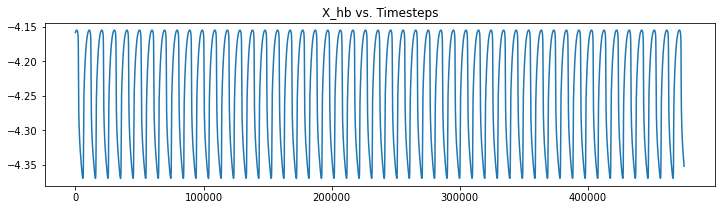

In [3]:
# Render trace w/o changes
plt.figure(1)
plt.title("X_hb vs. Timesteps")
t = int(steps//20)
plt.plot(hist[t:])

In [4]:
# render w/ random noise+
def randomwalk1D(n, scale=1., interval=None):
    '''
    @Params
        n:int
            The number of datapoints (+1)
        scale:float=1
            The amount dx is changed per dt
        interval:int | None
            If not None, the number of dx that the walk can deviate from the centre
    @Returns
        python list
    '''
    x = 0
    start = x
    xposition = [start]
    probabilities = [-scale, scale]
    for i in range(1, round(n) + 1):
        x += np.random.choice(probabilities)
        if interval is not None:
            if x > scale * interval:
                x = scale * interval
            elif x < -scale * interval:
                x = -scale * interval
        xposition.append(x)
    return xposition

noisy_hist = hist.copy()
del hist
noise = randomwalk1D(noisy_hist.shape[0] - 1, scale=2e-4, interval=50)
print(noise.__len__(), min(noise), max(noise))
noisy_hist += np.array(noise)

500000 -0.01 0.01


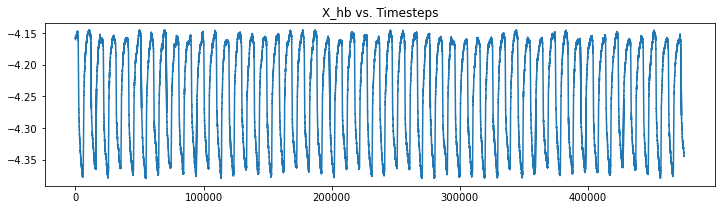

In [5]:
# Render trace w/ noise
plt.figure(2)
plt.title("X_hb vs. Timesteps")
t = int(steps//20)
plt.plot(noisy_hist[t:])
del noisy_hist

In [20]:
# Render trace w/ noise around bifurcation
noise_bifurcation = randomwalk1D(n=steps, scale=0.02, interval=100)
x = x0
noisy_hist2 = np.zeros(int(steps), dtype=np.float32)
param_hist = np.zeros(int(steps), dtype=np.float32)
new_params = params.copy()
param_idx = mn.get_parameter_names().index("Cgs")
params[param_idx] = 83.90419773794204 + 0.3
for t in range(int(steps)):
    noisy_hist2[t] = x[0]
    new_params[param_idx] = params[param_idx] + noise_bifurcation[t]
    param_hist[t] = new_params[param_idx]
    x = mn.RK2_calcululate_data_one_timestep(dt, new_params, x)
noisy_hist2 += np.array(noise)

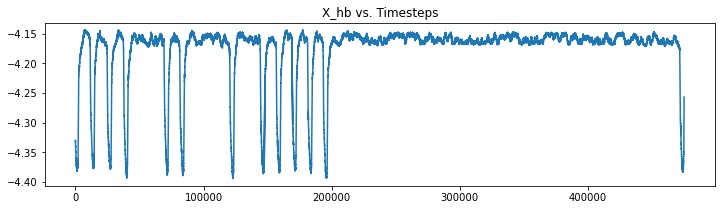

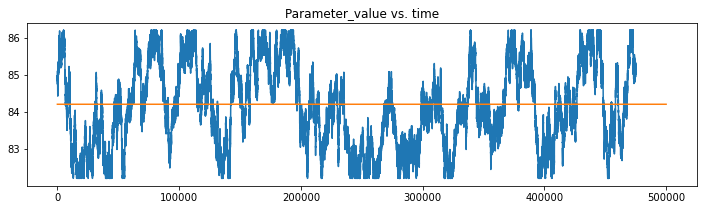

In [21]:
# Render trace
plt.figure(3)
plt.title("X_hb vs. Timesteps")
t = int(steps//20)
plt.plot(noisy_hist2[t:])
plt.figure(4)
plt.title("Parameter_value vs. time")
plt.plot(param_hist[t:])
plt.plot([params[param_idx]] * int(steps))